## Тестовое задание

В этом задании вам предстоит поработать с обезличенными транзакциями: посчитать описательные статистики, ответить на содержательные вопросы по данным, выполнить несколько adhoc-запросов.

Данные к заданию содержатся в файле `trans.xlsx`

#### 1. Загрузка данных

In [ ]:
### Импорт нужных библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
trans = pd.read_excel('trans.xlsx', engine='openpyxl')

In [ ]:
trans.head()

,city_date,city_time,brand_depers,category_depers,amt_depers
0,2021-01-12,2021-01-12 13:09:22,Бренд 403,Категория 12,165.11
1,2021-01-24,2021-01-24 12:23:49,Бренд 426,Категория 10,2520.17
2,2021-01-01,2021-01-01 19:04:06,Бренд 192,Категория 9,737.58
3,2021-01-04,2021-01-04 15:32:53,Бренд 119,Категория 17,3563.71
4,2021-01-11,2021-01-11 15:28:53,Бренд 119,Категория 17,5435.01


* `city_date` - дата совершения покупки
* `city_time` - дата и время совершения покупки
* `brand_depers` - наименование бренда
* `category_depers` - наименование категории
* `amt_depers` - сумма покупки, руб.

In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   city_date        5000 non-null   datetime64[ns]
 1   city_time        5000 non-null   object        
 2   brand_depers     5000 non-null   object        
 3   category_depers  5000 non-null   object        
 4   amt_depers       5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 195.4+ KB


In [ ]:
trans.duplicated().sum()

0

#### 2. Описательные статистики

За какой период представлены данные?

In [ ]:
f"В нашем датасете представлены данные с {trans['city_time'].min()} по {trans['city_time'].max()}"

'В нашем датасете представлены данные с 2021-01-01 01:10:15 по 2021-01-31 23:42:36'

Вычислите среднее арифметическое, медиану, максимум, минимум и стандартное отклонение для `amt_depers`

Выведем при помощи `describe`:

In [ ]:
trans['amt_depers'].describe()

count     5000.00
mean      1733.62
std       5004.72
min          0.92
25%        180.80
50%        500.70
75%       1516.17
max     117752.13
Name: amt_depers, dtype: float64

Создадим таблицу со значениями:

In [ ]:
amt_depers_describe = pd.DataFrame(
    {'Параметр' : ['Среднее', 'Медиана', 'Максимум', 'Минимум', 'Стандартное отклоенения'],
     'amt_depers_metrics' : [round(np.mean(trans['amt_depers']), 2),
                     round(np.median(trans['amt_depers']), 2),
                     round(np.max(trans['amt_depers']), 2),
                     round(np.min(trans['amt_depers']), 2),
                     round(np.std(trans['amt_depers']), 2)
                     ]
    }
)
amt_depers_describe

,Параметр,amt_depers_metrics
0,Среднее,1733.62
1,Медиана,500.70
2,Максимум,117752.13
3,Минимум,0.92
4,Стандартное отклоенения,5004.22


Постройте гистограмму распределения `amt_depers`. Подпишите оси графика.

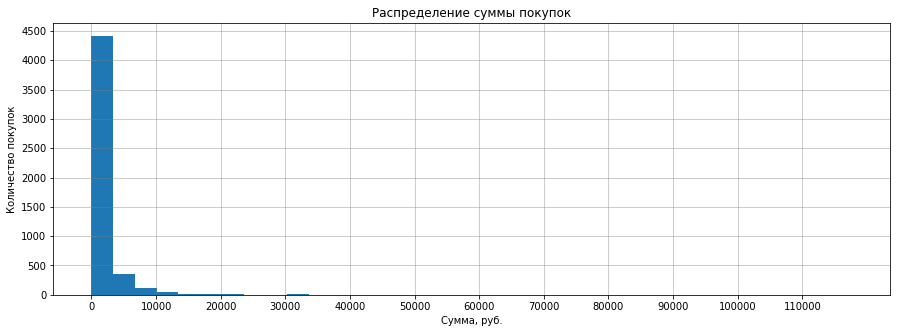

In [ ]:
plt.figure(figsize=(15, 5))
trans['amt_depers'].plot(kind='hist', bins=35)
plt.title('Распределение суммы покупок')
plt.ylabel('Количество покупок')
plt.xlabel('Сумма, руб.')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 5000, 500))
plt.xticks(np.arange(0, 120000, 10000))
plt.show()

Есть ли в  `amt_depers` выбросы?

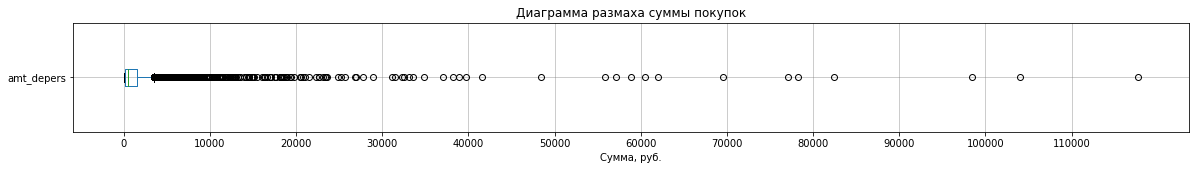

In [ ]:
trans.boxplot(column='amt_depers', vert=0, figsize=(20, 2))
plt.title('Диаграмма размаха суммы покупок')
plt.xlabel('Сумма, руб.')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.xticks(np.arange(0, 120000, 10000))
plt.show()

Если да, удалите их и постройте гистограмму заново

In [ ]:
trans['amt_depers'] = trans['amt_depers'][trans['amt_depers'] < np.percentile(trans['amt_depers'], 95)]

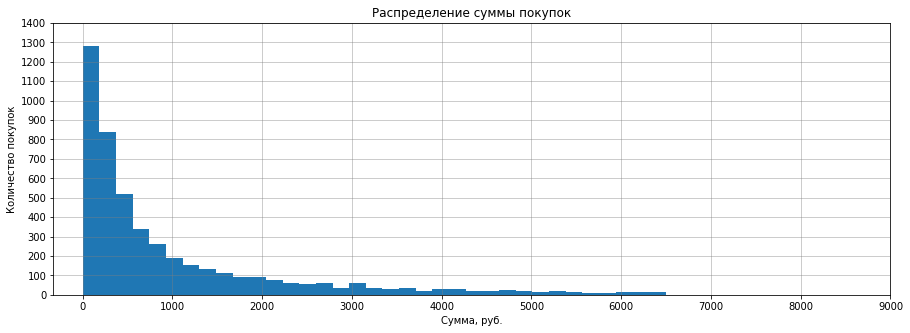

In [ ]:
plt.figure(figsize=(15, 5))
trans['amt_depers'].plot(kind='hist', bins=35)
plt.title('Распределение суммы покупок')
plt.ylabel('Количество покупок')
plt.xlabel('Сумма, руб.')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 1500, 100))
plt.xticks(np.arange(0, 10000, 1000))
plt.show()

Сколько в транзакционных данных уникальных брендов?

In [ ]:
f"Количество уникальных брендов: {len(trans['brand_depers'].unique())}"

'Количество уникальных брендов: 317'

А сколько уникальных категорий?

In [ ]:
f"Количество уникальных категорий: {len(trans['category_depers'].unique())}"

'Количество уникальных категорий: 23'

В какой день было совершено больше всего покупок?

In [ ]:
trans.groupby('city_date')['city_date'].agg(['count']).sort_values(
    by='count', ascending=False).reset_index().rename(
        columns = {'count': 'Количество_покупок'}).head(1)

,city_date,Количество_покупок
0,2021-01-03,238


А меньше всего покупок?

In [ ]:
trans.groupby('city_date')['city_date'].agg(['count']).sort_values(
    by='count', ascending=False).reset_index().rename(
        columns = {'count': 'Количество_покупок'}).tail(1)

,city_date,Количество_покупок
30,2021-01-18,98


Добавьте к данным информацию о типе дня недели: рабочий или выходной (это можно сделать, используя встроенные функции pandas). Выведите количество и сумму покупок в рабочие и в выходные дни. 

In [ ]:
def weekday(row):
  if row['city_date'].dayofweek >= 5:
    return 'Выходной день'
  else:
    return 'Рабочий день'

In [ ]:
trans['weekday'] = trans.apply(weekday, axis=1)

In [ ]:
trans.groupby('weekday')['amt_depers'].agg(['count', 'sum']).reset_index().rename(columns = {'sum': 'Сумма_покупок', 'count': 'Количество_покупок'})

,weekday,Количество_покупок,Сумма_покупок
0,Выходной день,1900,1979092.54
1,Рабочий день,2850,2741733.83


#### 3. Adhoc-запросы

Выведите список из топ-10 брендов по сумме трат за период. Для каждого бренда укажите число покупок, сумму трат и средний чек

In [ ]:
trans.groupby('brand_depers')['amt_depers'].agg(['count', 'sum', 'mean']).sort_values(
    by='sum', ascending=False).reset_index().rename(columns = {
        'brand_depers' : 'Наименование_бренда', 'sum': 'Сумма_трат', 'count': 'Количество_покупок', 'mean' : 'Средний_чек'}).head(10)

,Наименование_бренда,Количество_покупок,Сумма_трат,Средний_чек
0,Бренд 333,977,820374.62,839.69
1,Бренд 119,203,309091.64,1522.62
2,Бренд 212,123,160840.20,1307.64
3,Бренд 345,76,134589.28,1770.91
4,Бренд 319,58,128605.02,2217.33
5,Бренд 426,50,123804.41,2476.09
6,Бренд 104,72,121549.90,1688.19
7,Бренд 298,38,87954.62,2314.60
8,Бренд 347,71,85259.17,1200.83
9,Бренд 425,35,81049.86,2315.71


Выведите список из топ-3 брендов по сумме трат для каждой категории за период. Для каждого бренда укажите число покупок, сумму трат и средний чек

In [ ]:
# не понял формулировку задания, сделал как в текста, определил топ-3 бренда по суммат трат, и вывел их для каждой категории

df = trans[(trans['brand_depers'] == 'Бренд 333') |
           (trans['brand_depers'] == 'Бренд 119') |
           (trans['brand_depers'] == 'Бренд 212')
 ]
df= df.pivot_table(index=['brand_depers'], columns = 'category_depers', values='amt_depers', aggfunc=['sum', 'count', 'mean'])
df

sum               ...         mean             
category_depers Категория 1 Категория 16  ... Категория 16 Категория 17
brand_depers                              ...                          
Бренд 119               NaN          NaN  ...          NaN      1522.62
Бренд 212         160840.20          NaN  ...          NaN          NaN
Бренд 333               NaN    820374.62  ...       839.69          NaN

[3 rows x 9 columns]

Покажите распределение количества покупок за каждый день из периода (визуализация приветствуется) 

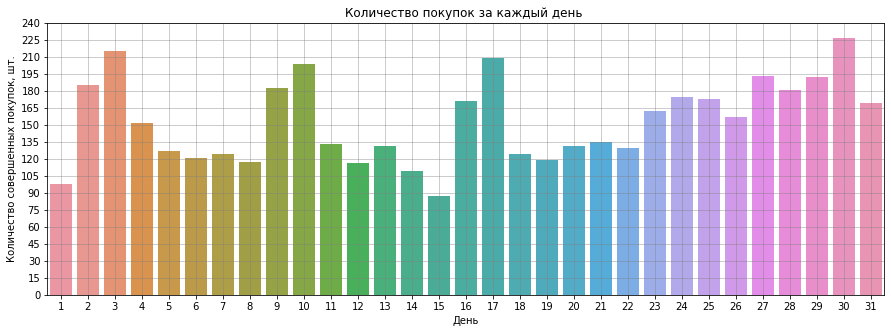

In [ ]:
kol = trans.groupby('city_date')['amt_depers'].agg('count').reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(data=kol, x=kol['city_date'].dt.day.value_counts().index, y="amt_depers")
plt.title('Количество покупок за каждый день ')
plt.ylabel('Количество совершенных покупок, шт.')
plt.xlabel('День')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 250, 15))
plt.show()

In [ ]:
trans

,city_date,city_time,brand_depers,category_depers,amt_depers,weekday
0,2021-01-12,2021-01-12 13:09:22,Бренд 403,Категория 12,165.11,Рабочий день
1,2021-01-24,2021-01-24 12:23:49,Бренд 426,Категория 10,2520.17,Выходной день
2,2021-01-01,2021-01-01 19:04:06,Бренд 192,Категория 9,737.58,Рабочий день
3,2021-01-04,2021-01-04 15:32:53,Бренд 119,Категория 17,3563.71,Рабочий день
4,2021-01-11,2021-01-11 15:28:53,Бренд 119,Категория 17,5435.01,Рабочий день
...,...,...,...,...,...,...
4995,2021-01-10,2021-01-10 12:40:26,Бренд 333,Категория 16,69.73,Выходной день
4996,2021-01-05,2021-01-05 14:11:13,Бренд 406,Категория 9,943.72,Рабочий день
4997,2021-01-08,2021-01-08 15:27:21,Бренд 378,Категория 18,4263.13,Рабочий день
4998,2021-01-26,2021-01-26 17:59:43,Бренд 333,Категория 16,1771.36,Рабочий день


Представим, что к каждой транзакции мы добавили признак `client_id` - уникальный идентификатор клиента, совершившего покупку. Теперь мы хотим сегментировать нашу аудиторию. Какие из имеющихся признаков можно для этого использовать? Какие дополнительные признаки могут понадобиться?  

_Ваш ответ:_


Из имеющихся признаков можно использовать для сегментирования аудитории:   
- `brand_depers`
- `category_depers`
- `amt_depers`
- `weekday`

Дополнительные признаки, которы могли бы нам понадобиться:  

- `пол, возраст, образование, семейное положение, количество детей`;
- `страна, город, в каких магазинах совершают покупки`;
- `средний чек, время покупки (перед праздником, в выходные дни, в будние дни)`.

#### 4. SQL-запросы



_Задача 1._

Есть таблица **transactions** вида 

| date       | Cash_flow |
| ---        | --- |
| 2021-05-11 | -110 |
| 2021-05-12 | -50 |

Переменная Сash_flow (денежный поток) = выручка - затраты за день.

Рассчитайте нарастающий итог денежного потока за каждый день.

In [ ]:
SELECT a."date" as "Дата", SUM(b."Cash_flow") as "Нарастающий итог"
FROM transactions a
JOIN transactions b ON a."date" >= b."date"
GROUP BY a."date"
ORDER BY 1;

_Задача 2._

Есть таблица **salaries** вида 

| depname    | Emp_id | salary |
| ---        | --- | --- |
| develop    | 1   | 100000|
| sales      | 2   | 50000 |

Переменная depname – название департамента, emp_id – идентификатор сотрудника, salary – суммарная зарплата.

Найдите сотрудника с самой большой зарплатой (учитывая случай одинаковых зарплат).

In [ ]:
SELECT "Emp_id", salary
FROM salaries
WHERE salary = (SELECT MAX(salary) FROM salaries);

_Задача 3._

Используя предыдущую таблицу добавьте столбец, в котором будет указана средняя зарплата в департаменте.

In [ ]:
SELECT depname, AVG(salary) as avg_salary
FROM salaries
GROUP BY depname
ORDER BY 2;

_Задача 4._

Есть таблица **sessions** вида 

| session_id    | length_sec | 
| ---        | --- | 
| 1   | 12|
| 2   | 34 |

Переменная session_id – уникальный идентификатор сессии, length_sec – продолжительность сессии в секундах.

Найдите количество сеансов, которые попадают в промежутки по 5 секунд.

In [ ]:
SELECT COUNT(session_id) AS "Количество сеансов по 5 секунд"
FROM sessions
WHERE length_sec = 5;

_Задача 5._

Есть таблица **covid** вида 

| region    | ttl | 
| ---        | --- | 
| Москва   | 34523 |
| Московская область   | 18775 |

Переменная region – регион РФ, ttl – общее количество заболевших за определенный период.

Найдите пары регионов с общим количеством заболевших в пределах тысячи друг от друга (учитывая, что пары типа регион1 – регион2 и регион2 – регион1 одинаковые).

In [ ]:
SELECT a.region as "Первый регион", b.region "Второй регион"
FROM covid a
CROSS JOIN covid b
WHERE ABS(a.ttl - b.ttl) <= 1000 AND a.ttl < b.ttl;

_____